# BUSINESS CASE: WITH TEXAS STATE EMPLOYEE SALARY DATASET WE NEED TO PREDICT THE SALARY OF A STATE EMPLOYEE.

# Project Pipeline:
1. Import Libraries
2. Basic Checks
3. Exploratory Data Analysis
4. Data Preprocessing
5. Feature Engineering AND Feature Selection
6. Split The Data for Train and Test
7. Scale The Features
8. Build The Models
9. Conclusion Based On The Models' Performances

## 1. Import Libraries
* All the required libraries are imported.

## 2. Basic Checks

* There are 21 features with 149481 records.
* **HRLY RATE** is 0 for more than 75% records. Logically it cannot be Zero for any employee. It is equivalent to NULL value.
* **ANNUAL** salary ranges from 600 - $553500.
* More than 75% people work 40 **HRS PER WK**.
* More than 99% of data are missing in **multiple_full_time_jobs**, **summed_annual_salary**, **duplicated**, **multiple_full_time_jobs**, **summed_annual_salary**, **combined_multiple_jobs** and **hide_from_search**.
* **EMPLOY DATE** is in object datatype.

## 3. Exploratory Data Analysis
* ## Univariate Analysis
    * **'AGENCY NAME','CLASS CODE','CLASS TITLE','ETHNICITY', 'GENDER', 'STATUS'** have lot of white spaces in the beginning and at the end of their values. Those white spaces are **_stripped_**.
    * **AGENCY NAME, CLASS CODE, CLASS TITLE** features have too many categories-**113, 1481, 1422** respectively.
    * **ETHNICITY, GENDER, STATUS** features have few categories-**6, 2, 11** respectively.
    * **AGENCY** is the code of **AGENCY NAME**. There are 113 unique agencies.
    * **CLASS CODE** is the code of a **CLASS TITLE** under a particular **AGENCY**. So, according to the change in AGENCY NAME, CLASS CODE of a CLASS TITLE changes. Hence, same CLASS TITLE has different CLASS CODE. For eg, there are CHIEF JUSTICEs in different courts(AGENCY NAMEs). The CLASS CODE for each CHIEF JUSTICE depends on the court(AGENCY NAME) he works in.
    * More than 99% of data in **STATE NUMBER** is unique.
    * 98.83% of **HRLY RATE** has its value as 0 which is equivalent to NULL.
    * **CLASS TITLEs**-**'CORREC OFFICER IV'** and **'CORREC OFFICER V'** have the most employees.
    * **AGENCY NAMEs**-**'HEALTH AND HUMAN SERVICES COMMISSION'** and **'TEXAS DEPARTMENT OF CRIMINAL JUSTICE'** have the most employees.
    * **ETHNICITY**- **WHITES** > HISPANIC > BLACK employees.
    * **GENDER**- **FEMALE** > MALE employees
    * **STATUS**- More than 90% of employees are **CLASSIFIED REGULAR FULL-TIME** employees.
    * There is a mismatch in the shortform and expansion of the status -**CTP - CLASSIFIED TEMPORARY FULL-TIME**. It is **_removed_** as its a single record.
    * 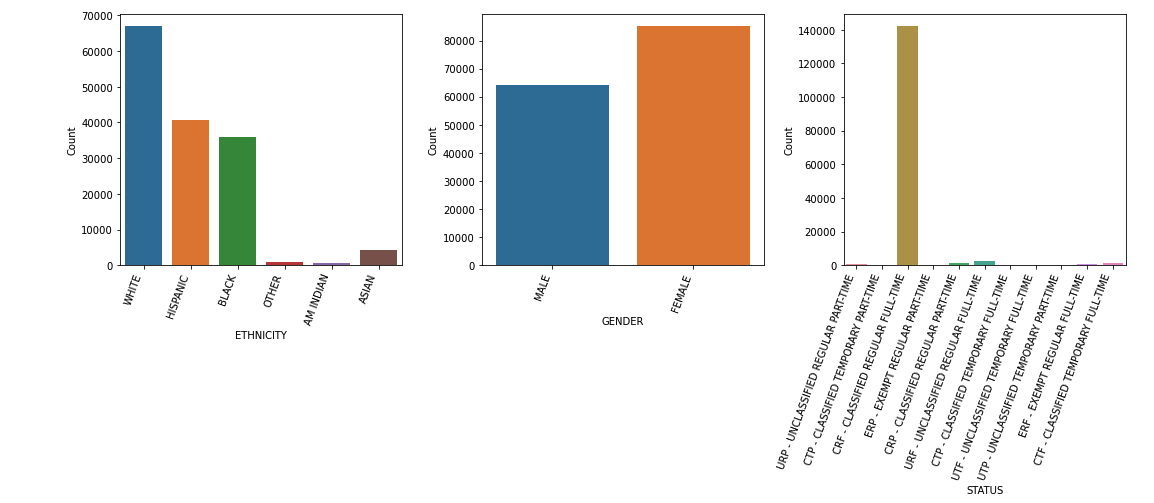
    * **EMPLOY DATE** datatype is **_changed_** to datetime.
    * Large number of employees joined in 2019 followed by 2017.
    * Future years like 2068,69,71,72,73 are shown which are the outliers.
    * **HRS PER WK** - More than 90% of the employees work around 40 hours per week.
    * **MONTHLY** and **ANNUAL** are correlated. ANNUAL=12*MONTHLY.
* ## Bivariate and Multivariate Analysis
    * In every **ETHNICITY**, FEMALE is more than MALE.
    * Always every year, **White > Hispanic > Black** are joined for job except in 2017 and 2019 where the trend is **White > Black > Hispanic**.
    * **EXEMPT REGULAR FULL-TIME** employees are paid the best. in general, **REGULAR** employees are paid better than TEMPORARY employees.
    * **ASIANS** are paid the most.
    * **'BOARD OF PROFESSIONAL LAND SURVEYING'** AGENCY has the **LOWEST wage difference** between its highest paid and lowest paid employees.
    * **'CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS'** AGENCY has the **HIGHEST wage difference** between its highest paid and lowest paid employees.
    * 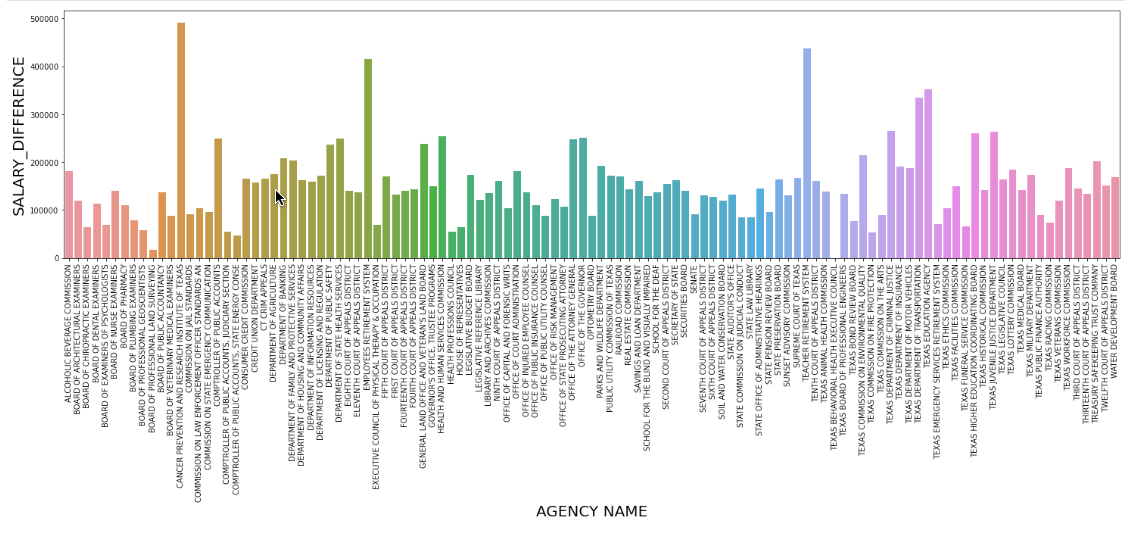
 
    * 
      
    * For some **CLASS TITLE**s salary has increased, for some **CLASS TITLE**s salary has remained same (with few fluctuations in between) and for **CLASS TITLE**s salary has decreased.
    * 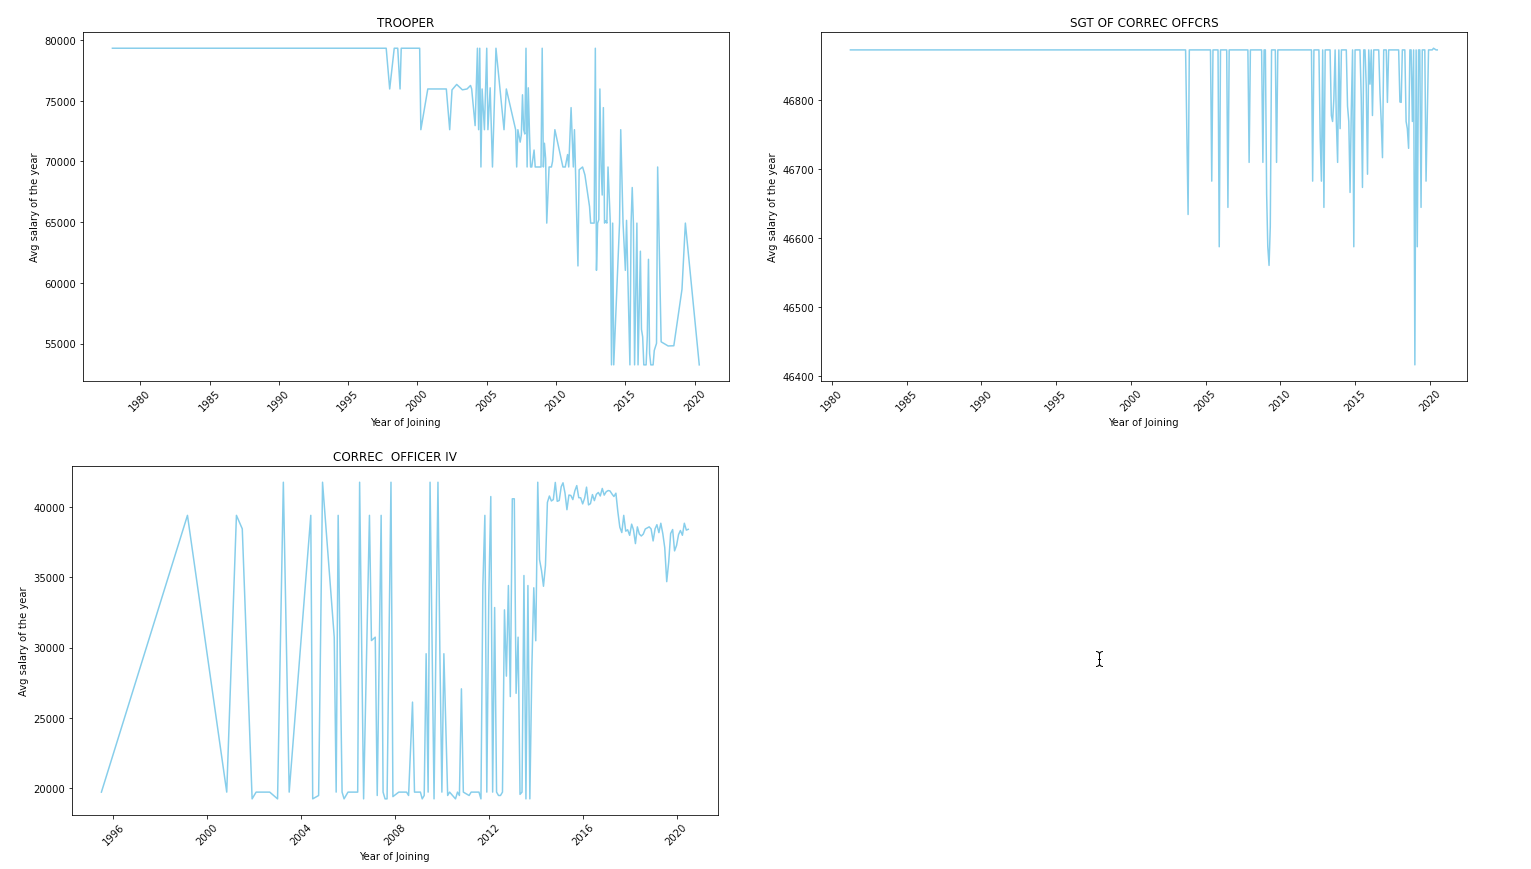

## 4. Data Preprocessing
### Impute NULL values
* During EDA, its found that **98.83%** of **HRLY RATE** has its value as **0** which is equivalent to **NULL**.
* More than 99% of **duplicated, multiple_full_time_jobs, combined_multiple_jobs, summed_annual_salary, hide_from_search** are NULL.
* So, all the above mentioned NULL values and 0s will not be imputed.

### Encode Categorical Data
* **'AGENCY NAME', 'CLASS CODE' , 'CLASS TITLE'** have too many categories.So, they are frequency encoded.
* **"GENDER"** has only 2 category. So, it is one-hot encoded.
* **'ETHNICITY' and 'STATUS'** have few categories. So, they are manually encoded because some of them are frequently present while others are not and there is no ordinality. So, label encoding is not used.

### Handle Outliers
* **'HRS PER WK', 'MONTHLY', 'ANNUAL'** have too many outliers. So, we are not imputing them.

### Check For Duplicate Rows
* There are no duplicate rows.

## 5. Feature Engineering And Feature Selection
### Check For Duplicate Features
* There are no duplicate features

### CREATE NEW FEATURE
* **'Exp_Years'** feature is created using 'EMPLOY DATE' and current year for calculating Years of Experience of each employee.
* Employees who have EMPLOY DATE as future dates are removed.

### DROP IRRELEVANT FEATURES
* **'AGENCY','LAST NAME', 'FIRST NAME', 'MI','EMPLOY DATE','HRLY RATE','STATE NUMBER', 'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs', 'summed_annual_salary', 'hide_from_search'** features are removed.

### Check For Correlated Features
* **'ANNUAL' and 'MONTHLY'** are fully correlated. So,'MONTHLY' is removed.
* **'CLASS CODE' and 'CLASS TITLE'** are fully correlated. So,'CLASS CODE' is removed.

## 6. Split The Data for Train and Test
* First, the data is split into predictors/independent features and target/dependent features. **ANNUAL** is chosen as dependent feature.
* Then, the data is split into 25% Test and 75% Train data.

## 7. Scale The Features
* The independent features are scaled using MinMaxScaler.
* Only train data are fit-transformed. Test data was only transformed to prevent data leakage.

## 8. Build The Models
* Four models are built with and without hyperparameter tuning and checked all the metrics 
* **R2-score** is used as the performance metric.

## (1) Linear Regression
* Test R2 Score : 0.27252579053923265
* Train R2 Score : 0.26823545383421177
* Mean Squared Error is : 451224892.176819
* Root Mean Squard Error is : 21242.05480119141
* Mean Absolute Error is : 13798.53054820892

## (2) Ridge Regression
GridSearchCV is used to choose value for 'alpha' hyperparameter.
* Test R2 Score : 0.27252874468153554
* Train R2 Score : 0.268229535847171
* Mean Squared Error is : 451223059.83345234
* Root Mean Squard Error is : 21242.011671060074
* Mean Absolute Error is : 13798.399332557576

## (3) Lasso Regression
GridSearchCV is used to choose value for 'alpha' hyperparameter.
* Test R2 Score : 0.2725288335655027
* Train R2 Score : 0.2682295360301101
* Mean Squared Error is : 451223004.7020704
* Root Mean Squard Error is : 21242.010373363213
* Mean Absolute Error is : 13798.392006562535

## (4) GRADIENT BOOSTING REGRESSION 
* Test R2 Score : 0.5357545061829732
* Train R2 Score : 0.5390450926334667
* Mean Squared Error is : 287954019.767156
* Root Mean Squard Error is : 16969.207988800066
* Mean Absolute Error is : 10271.415312002595

## (5) XG BOOST REGRESSION
RandomizedSearchCV is used for hyperparameter tuning.
* Test R2 Score : 0.8533490682012758
* Train R2 Score : 0.9208562493395436
* Mean Squared Error is : 90962057.52442975
* Root Mean Squard Error is : 9537.403080735854
* Mean Absolute Error is : 4153.726289168567
* 
## (6) RANDOM FOREST REGRESSION
RandomizedSearchCV is used for hyperparameter tuning.
* Test R2 Score : 0.7963993599534207
* Train R2 Score : 0.9238209137331412
* Mean Squared Error is : 126285819.69970663
* Root Mean Squard Error is : 11237.696369795129
* Mean Absolute Error is : 4699.841591171085

## SUMMARY
* For each model, R2-scores on test data and train data after hyperparameter tuning are chosen.
* 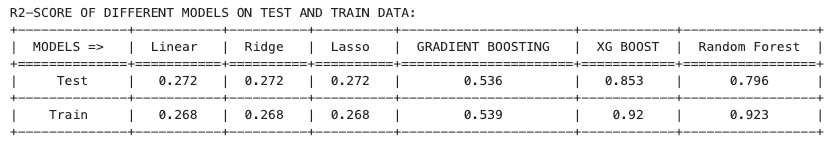

## CHALLENGES FACED
* Hyperparameter tuning of XGBOOST took 3 hours.
* Hyperparameter tuning of RANDOM FOREST took 10 hours.

# 9. CONCLUSION
* R2 score on test data using **XGBOOST** model after hyperparameter tuning is better than any other model.
* **Adjusted R2 Score** on Test data using **XGBOOST** model after hyperparameter tuning is : **0.853**

# PROJECT IMPLEMENTATION:

# IMPORT LIBRARIES

In [706]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display


# BASIC CHECKS

In [707]:
data = pd.read_csv("salary.csv")

In [708]:
pd.set_option('display.max_columns',None)
original_data=data.copy()

In [709]:
data.head(5)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [710]:
data.shape

(149481, 21)

In [711]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

* **EMPLOY DATE** should be changed to datetime datatype.
* More than 99% of data are missing in **duplicated**,**multiple_full_time_jobs**,**summed_annual_salary**,**combined_multiple_jobs** and **hide_from_search**.


In [712]:
data.tail(3)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,02/16/12,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [713]:
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


* **HRLY RATE** is 0 for more than 75%. Logically it cant be Zero for any employee. It is equivalent to NULL value.
* More than 75% people work 40 **HRS PER WK**.
* More than 99% of data are missing in **multiple_full_time_jobs** and **summed_annual_salary**

In [714]:
data.describe(include='O')

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


* More than 99% of data are missing in **duplicated**,**combined_multiple_jobs** and **hide_from_search**

In [715]:
data.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

# Exploratory Data Analysis

## **Univariate Analysis**

In [716]:
data.head(2)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True


#### **Remove WHITE SPACES at the beginning and end of values in the following columns.**

In [717]:
col_white_space=['AGENCY NAME','CLASS CODE','CLASS TITLE','ETHNICITY', 'GENDER', 'STATUS']
for col in col_white_space:
    data[col] = data[col].str.strip()

In [718]:
data.head(2)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True


### AGENCY and AGENCY NAME

In [719]:
print('No.of AGENCY: ',data['AGENCY'].nunique())
print('No.of AGENCY NAME: ',data['AGENCY NAME'].nunique())

No.of AGENCY:  113
No.of AGENCY NAME:  113


* **AGENCY** is the code of **AGENCY NAME**. So, we can use one of it for analysis.

### CLASS CODE and CLASS TITLE

In [720]:
print('No.of CLASS CODE: ',data['CLASS CODE'].nunique())
print('No.of CLASS TITLE : ',data['CLASS TITLE'].nunique())

No.of CLASS CODE:  1481
No.of CLASS TITLE :  1422


In [721]:
grouped = data.groupby(['CLASS TITLE', 'CLASS CODE']).size()

# Filter CLASS TITLE groups where the number of unique CLASS CODEs is greater than 1
multiple_class_codes = grouped[grouped.groupby('CLASS TITLE').transform('size') > 1]

print(multiple_class_codes)
pd.reset_option('display.max_rows',None)

CLASS TITLE                     CLASS CODE
ACCOUNTANT                      1409            1
                                A014            1
ACCOUNTANT I                    1012          147
                                3000            2
ACCOUNTANT II                   1014          388
                                             ... 
SYSTEMS ANALYST V               4041            2
SYSTEMS SUPPORT SPECIALIST III  0230          236
                                8056            2
TECHNICAL WRITER                4368            1
                                8030            2
Length: 175, dtype: int64


In [722]:
# Checking the CLASS CODEs of a same CLASS TITLE
data.loc[data['CLASS TITLE'].str.contains('CHIEF JUSTICE')]

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
572,201,SUPREME COURT OF TEXAS,HECHT,NATHAN,L,C097,CHIEF JUSTICE,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,01/01/89,0.0,40.0,17050.00,204600.00,17360,NaN,NaN,NaN,NaN,NaN
995,221,FIRST COURT OF APPEALS DISTRICT,RADACK,SHERRY,,C109,CHIEF JUSTICE,WHITE,FEMALE,ERF - EXEMPT REGULAR FULL-TIME,12/01/01,0.0,40.0,15650.00,187800.00,9901,NaN,NaN,NaN,NaN,NaN
1036,222,SECOND COURT OF APPEALS DISTRICT,SUDDERTH,BONNIE,,C111,CHIEF JUSTICE,WHITE,FEMALE,ERF - EXEMPT REGULAR FULL-TIME,01/08/15,0.0,40.0,15650.00,187800.00,116112,NaN,NaN,NaN,NaN,NaN
1067,223,THIRD COURT OF APPEALS DISTRICT,ROSE,JEFF,L,C112,CHIEF JUSTICE,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,12/06/10,0.0,40.0,15650.00,187800.00,63521,NaN,NaN,NaN,NaN,NaN
1089,224,FOURTH COURT OF APPEALS DISTRICT,MARION,SANDEE,B,C118,CHIEF JUSTICE,WHITE,FEMALE,ERF - EXEMPT REGULAR FULL-TIME,01/02/02,0.0,40.0,15650.00,187800.00,5520,NaN,NaN,NaN,NaN,NaN
1114,225,FIFTH COURT OF APPEALS DISTRICT,BURNS,ROBERT,D,C122,CHIEF JUSTICE,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,01/01/19,0.0,40.0,15650.00,187800.00,172233,NaN,NaN,NaN,NaN,NaN
1174,226,SIXTH COURT OF APPEALS DISTRICT,MORRISS III,JOSH,R,C143,CHIEF JUSTICE,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,06/11/02,0.0,40.0,15650.00,187800.00,38158,NaN,NaN,NaN,NaN,NaN
1195,227,SEVENTH COURT OF APPEALS DISTRICT,QUINN,BRIAN,P,C052,CHIEF JUSTICE,HISPANIC,MALE,ERF - EXEMPT REGULAR FULL-TIME,01/01/95,0.0,40.0,15650.00,187800.00,82014,NaN,NaN,NaN,NaN,NaN
1202,228,EIGHTH COURT OF APPEALS DISTRICT,ALLEY,JEFFREY,S,C063,CHIEF JUSTICE,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,10/20/14,0.0,40.0,13041.66,156499.92,758601,NaN,NaN,NaN,NaN,NaN
1231,229,NINTH COURT OF APPEALS DISTRICT,MCKEITHEN,STEVE,A,C027,CHIEF JUSTICE,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,01/01/03,0.0,40.0,15650.00,187800.00,77893,NaN,NaN,NaN,NaN,NaN


* **CLASS CODE** is the code of a **CLASS TITLE** under a particular **AGENCY**. For eg, there are CHIEF JUSTICEs in different courts. The CLASS CODE for each CHIEF JUSTICE depends on the court he works in.
* So, for different Agencies, there will be same class title names but with different class codes according to the agencies. 
* **CLASS CODES** is formed according to the combination of AGENCY and CLASS TITLE.

### **STATE NUMBER**

In [723]:
data['STATE NUMBER'].nunique()

149465

* More than 99% of data in **STATE NUMBER** is unique. So, we are not taking it for analysis.

### **HRLY RATE** 

In [724]:
# Calculate % of HRLY RATE that has its value as 0.
prct=len(data[data['HRLY RATE']==0])/data.shape[0]*100
print(f'{round(prct,2)}% of HRLY RATE has its value as 0 which is equivalent to NULL.')

98.83% of HRLY RATE has its value as 0 which is equivalent to NULL.


In [22]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

* So, for univariate analysis, we use only **'AGENCY NAME', 'CLASS TITLE', 'CLASS CODE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL'** features.

### CATEGORICAL FEATURES WITH TOO MANY CATEGORIES - **AGENCY NAME, CLASS CODE, CLASS TITLE**


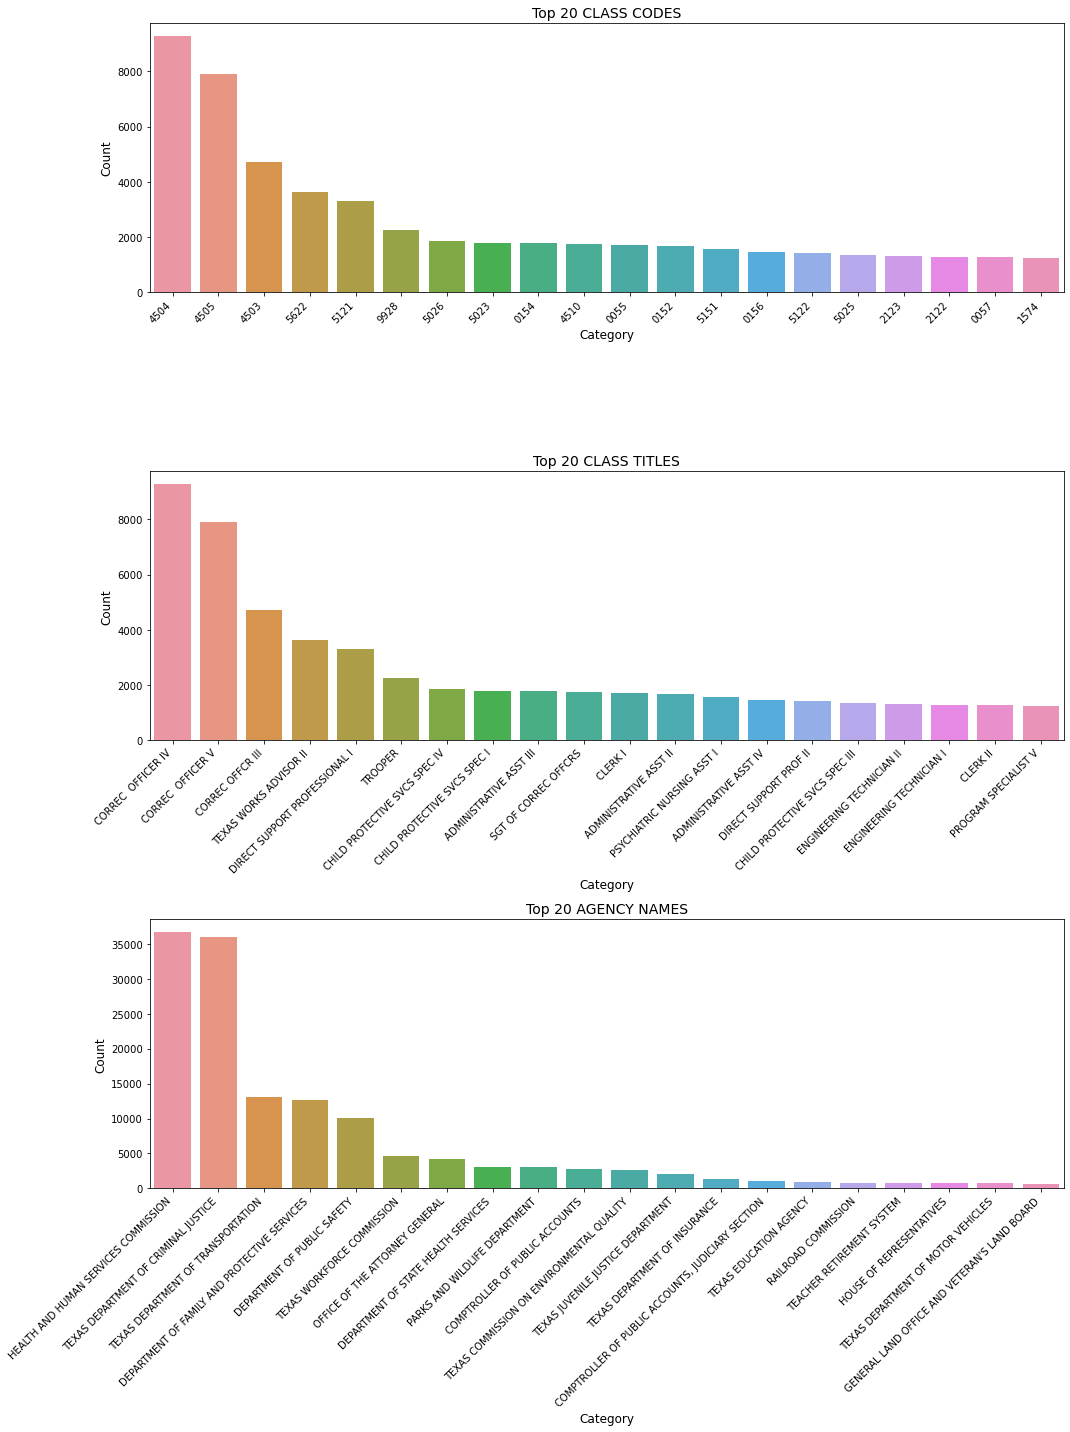

In [725]:
plt.figure(figsize=(15, 20))
plotnumber=1
N=20
col=['CLASS CODE','CLASS TITLE','AGENCY NAME']
for col in col:
    if plotnumber<=3:
        top_categories = data[col].value_counts().head(20)
        ax=plt.subplot(3,1,plotnumber)
        sns.barplot(x=top_categories.index, y=top_categories.values)
        plt.xlabel('Category', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.title(f'Top {N} {col}S', fontsize=14)
        plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability
        plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

* **'CORREC OFFICER IV'** and **'CORREC OFFICER V'** CLASS TITLEs have the most employees.
* **'HEALTH AND HUMAN SERVICES COMMISSION'** and **'TEXAS DEPARTMENT OF CRIMINAL JUSTICE'** AGENCIES have the most employees.

### CATEGORICAL FEATURES WITH FEW CATEGORIES - **ETHNICITY, GENDER, STATUS**

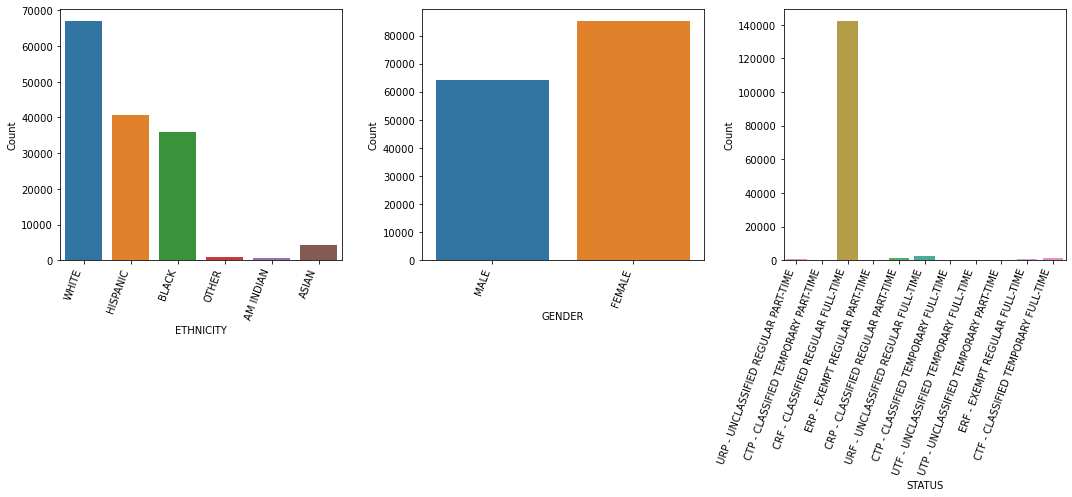

In [726]:
plt.figure(figsize=(15,7),facecolor='white')
plotnumber=1
drop_col=['AGENCY','LAST NAME', 'FIRST NAME', 'MI','EMPLOY DATE','CLASS TITLE','EMPLOY DATE','HRLY RATE', 
          'duplicated', 'multiple_full_time_jobs', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
          'combined_multiple_jobs', 'summed_annual_salary', 'hide_from_search','AGENCY NAME','CLASS CODE']
for column in data.drop(drop_col, axis=1):
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.countplot(data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
        plt.xticks(rotation=70,ha='right' )
        plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

* **ETHNICITY**- **WHITES** > HISPANIC > BLACK employees.
* **GENDER**- **FEMALE** > MALE employees
* **STATUS**- More than 90% of employees are **CLASSIFIED REGULAR FULL-TIME** employees.
* There is a mismatch in the shortform and expansion of the status - **CTP - CLASSIFIED TEMPORARY FULL-TIME**

In [727]:
data.loc[data['STATUS'].str.contains('CTP - CLASSIFIED TEMPORARY FULL-TIME')]

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
140,809,STATE PRESERVATION BOARD,HOULE,LAURA,J,0130,CUSTOMER SERVICE REP I,WHITE,FEMALE,CTP - CLASSIFIED TEMPORARY FULL-TIME,10/01/19,11.5,40.0,1993.32,23919.84,1227561,True,NaN,True,NaN,NaN


In [728]:
# Since there is only one mismatch record, we delete it.
# Delete record at index 140
data.drop(index=140, inplace=True)

In [729]:
#Recheck
data.loc[data['STATUS'].str.contains('CTP - CLASSIFIED TEMPORARY FULL-TIME')]

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search


### DATE FEATURE - **EMPLOY DATE**

In [730]:
# Convert the datatype from object to datetime
data["EMPLOY DATE"]=pd.to_datetime(data["EMPLOY DATE"])
print(data["EMPLOY DATE"].dtype)

datetime64[ns]


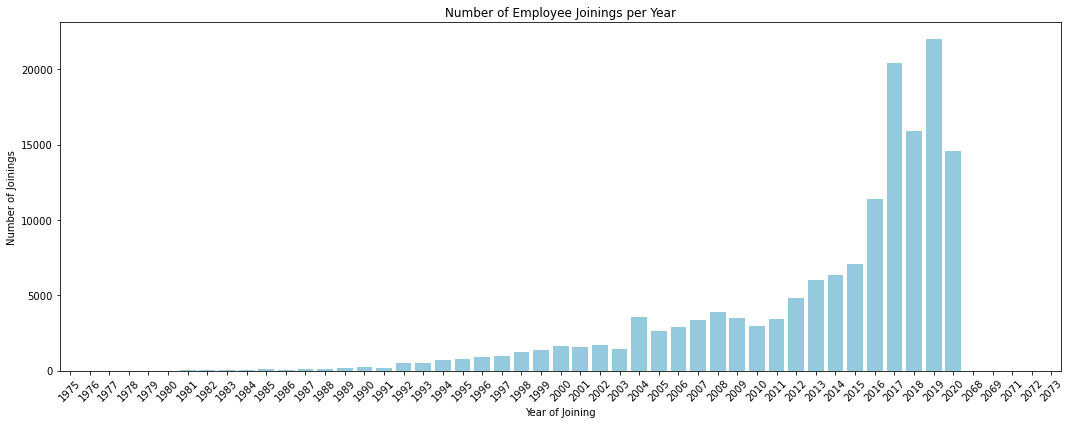

In [731]:
joinings_per_year = data['EMPLOY DATE'].dt.year.value_counts().sort_index()

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x=joinings_per_year.index, y=joinings_per_year.values, color='skyblue')
plt.xlabel('Year of Joining')
plt.ylabel('Number of Joinings')
plt.title('Number of Employee Joinings per Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

* Large number of employees joined in 2019 followed by 2017.
* Future years like 2068,69,71,72,73 are shown which are the outliers.

### CONTINUOUS FEATURE- **HRS PER WK, MONTHLY, ANNUAL**

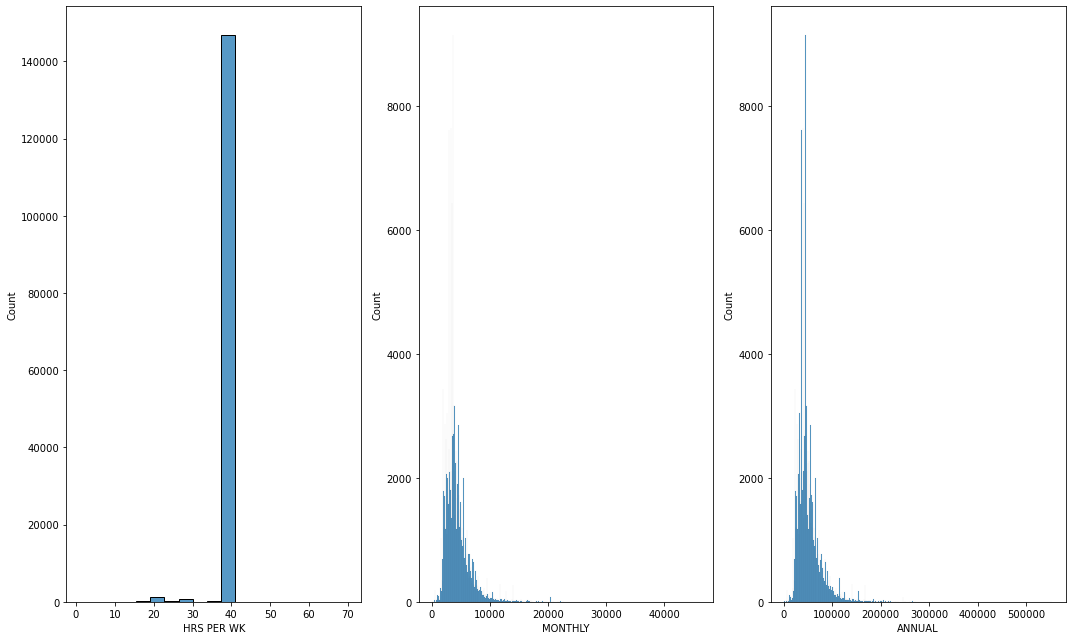

In [732]:
plt.figure(figsize=(15,9),facecolor='white')
plotnumber=1
col=['HRS PER WK', 'MONTHLY', 'ANNUAL']
for column in col:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber=plotnumber+1
plt.tight_layout()

* More than 90% of the employees work around 40 hours per week.
* MONTHLY and ANNUAL are correlated.

## **Bivariate Analysis**

### ETHNICITY VS GENDER

<AxesSubplot:xlabel='ETHNICITY', ylabel='count'>

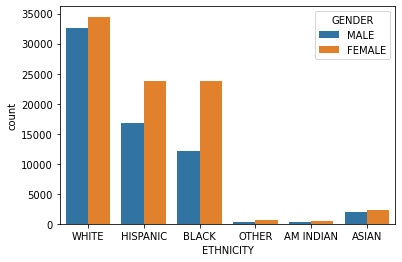

In [733]:
sns.countplot(x='ETHNICITY',data=data, hue='GENDER')

* In every ethnicity, FEMALE is more than MALE.

### EMPLOY DATE VS ETHNICITY

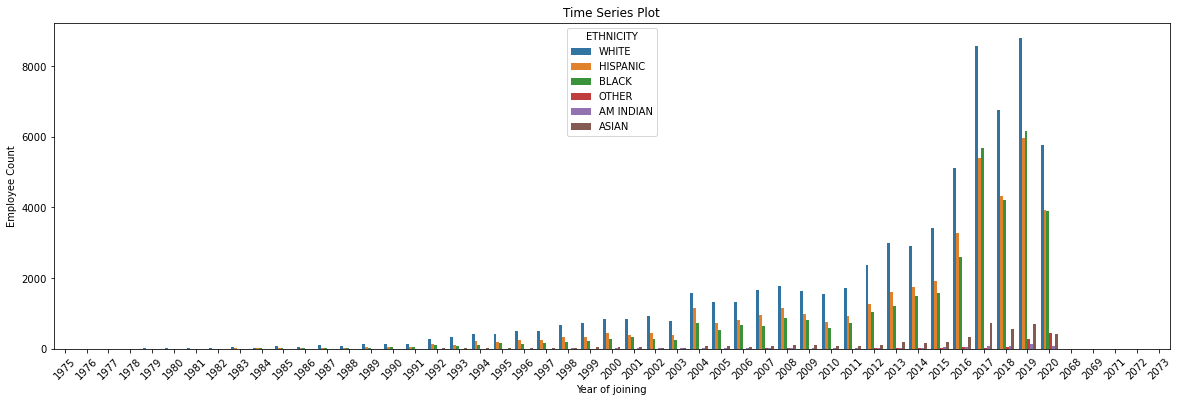

In [734]:
plt.figure(figsize=(20, 6))
sns.countplot(x=data['EMPLOY DATE'].dt.year, hue='ETHNICITY',data=data)
plt.xlabel('Year of joining')
plt.xticks(rotation=45)
plt.ylabel('Employee Count')
plt.title('Time Series Plot')
plt.show()

* Always every year, **White > Hispanic > Black** are joined for job except in 2017 and 2019 where the trend is **White > Black > Hispanic**.

### Top 7 Highest Paid Employees

In [735]:
df_Class_sal=data.sort_values(by='ANNUAL',ascending=False)[['CLASS TITLE','ANNUAL']].head(7)
df_Class_sal

,CLASS TITLE,ANNUAL
83851,CHIEF SCIENTIFIC OFFICER,553500.00
144232,DIRECTOR OF INVESTMENTS,450000.00
14793,CHIEF INVESTMENT OFFICER,450000.00
15154,SENIOR MANAGING DIRECTOR,391999.92
136727,PSF CHIEF INVESTMENT OFFICER,384375.00
15041,EXECUTIVE DIRECTOR,355141.44
15539,SENIOR MANAGING DIRECTOR,344000.04


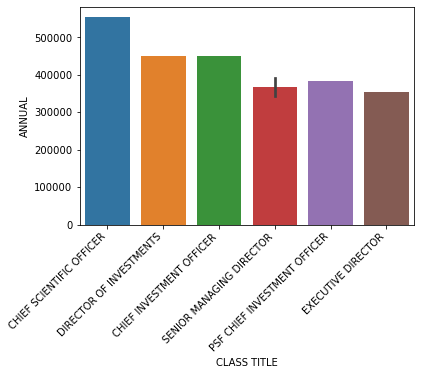

In [737]:
sns.barplot(x=df_Class_sal['CLASS TITLE'],y='ANNUAL',data=df_Class_sal)
plt.xticks(rotation=45,ha='right')
plt.show()

### High Earning Class Title in Each Agency

In [738]:
pivot_table = pd.pivot_table(data, index=['AGENCY NAME', 'CLASS TITLE'], values='ANNUAL').reset_index()

# Define a custom sorting function
def sort_within_group(group):
    return group.sort_values(by='ANNUAL', ascending=False)

# Sort the pivot table within each group of 'AGENCY NAME'
pivot_table_sorted = pivot_table.groupby('AGENCY NAME').apply(sort_within_group).reset_index(drop=True)
pivot_table_sorted.groupby('AGENCY NAME').first()


,CLASS TITLE,ANNUAL
AGENCY NAME,,
ALCOHOLIC BEVERAGE COMMISSION,"ADMINISTRATOR, TEXAS A B C",199999.92
BOARD OF ARCHITECTURAL EXAMINERS,EXECUTIVE DIRECTOR,145604.64
BOARD OF CHIROPRACTIC EXAMINERS,EXECUTIVE DIRECTOR,100830.00
BOARD OF DENTAL EXAMINERS,DENTIST III,139327.08
BOARD OF EXAMINERS OF PSYCHOLOGISTS,GENERAL COUNSEL II,90000.00
...,...,...
THIRD COURT OF APPEALS DISTRICT,CHIEF JUSTICE,187800.00
THIRTEENTH COURT OF APPEALS DISTRICT,CHIEF JUSTICE,187800.00
TREASURY SAFEKEEPING TRUST COMPANY,CHIEF EXECUTIVE OFFICER,240000.00


### STATUS VS ANNUAL

In [739]:
sorted_pivot_table=pd.pivot_table(data, index = ['STATUS'], values = 'ANNUAL').sort_values(by='ANNUAL', ascending=False)
sorted_pivot_table

,ANNUAL
STATUS,
ERF - EXEMPT REGULAR FULL-TIME,155908.362774
URF - UNCLASSIFIED REGULAR FULL-TIME,68286.678764
URP - UNCLASSIFIED REGULAR PART-TIME,67191.242021
ERP - EXEMPT REGULAR PART-TIME,51383.400000
CRF - CLASSIFIED REGULAR FULL-TIME,50076.064007
UTF - UNCLASSIFIED TEMPORARY FULL-TIME,38233.830000
CTF - CLASSIFIED TEMPORARY FULL-TIME,33438.017409
CRP - CLASSIFIED REGULAR PART-TIME,23939.806871
CTP - CLASSIFIED TEMPORARY PART-TIME,19351.093333


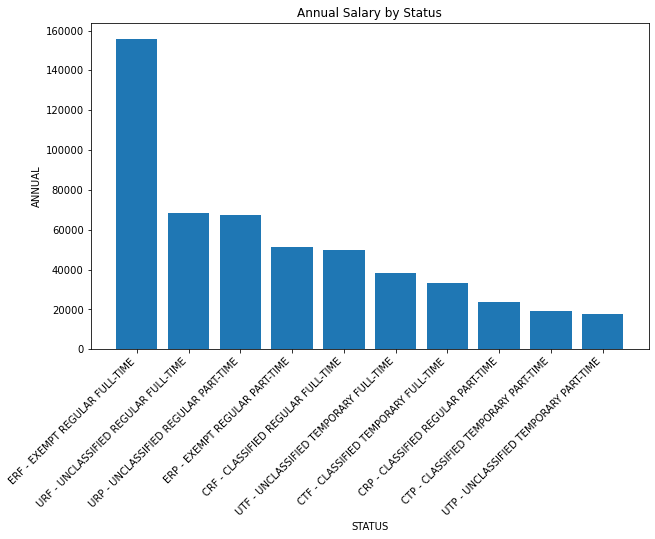

In [740]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_pivot_table.index, sorted_pivot_table['ANNUAL'])
plt.xlabel('STATUS')
plt.ylabel('ANNUAL')
plt.title('Annual Salary by Status')
plt.xticks(rotation=45,ha='right')
plt.show()

* In general, REGULAR employees are paid better than TEMPORARY employees.

### ETHNICITY VS ANNUAL

In [741]:
sorted_ethnicity=pd.pivot_table(data, index = ['ETHNICITY'], values = 'ANNUAL').sort_values(by='ANNUAL', ascending=False)
sorted_ethnicity

,ANNUAL
ETHNICITY,
ASIAN,63711.042118
WHITE,56058.411468
AM INDIAN,51416.548820
HISPANIC,47210.593195
OTHER,45544.809772
BLACK,43244.728227


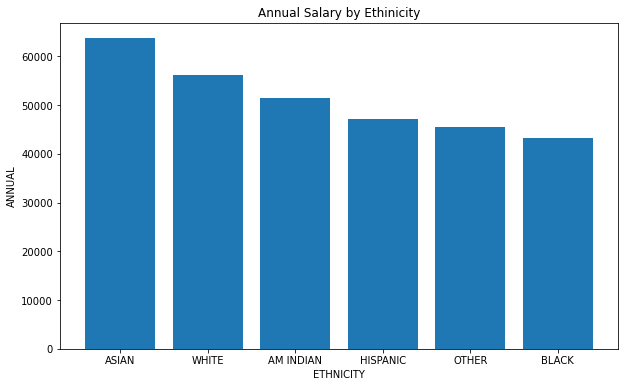

In [742]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_ethnicity.index, sorted_ethnicity['ANNUAL'])
plt.xlabel('ETHNICITY')
plt.ylabel('ANNUAL')
plt.title('Annual Salary by Ethinicity')
plt.show()

* ASIANS are paid the most.

# Task 3 - A : Who are the outliers in the salaries?


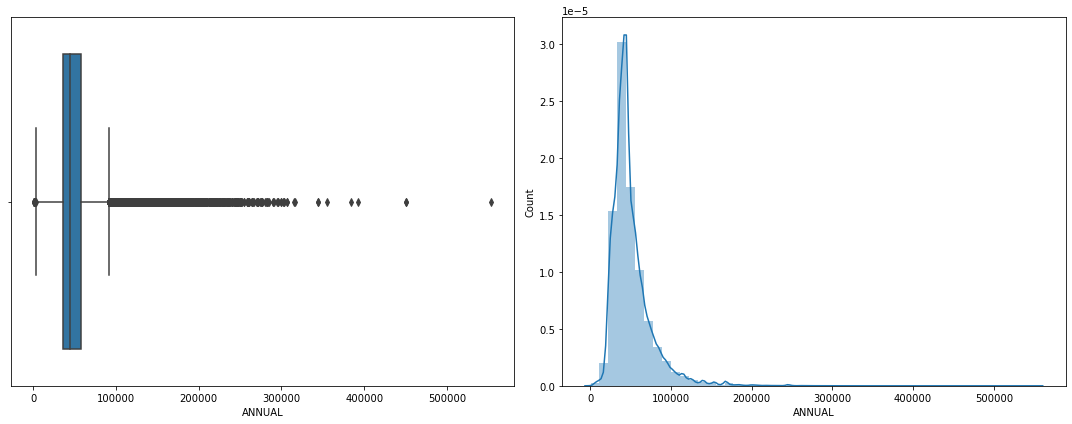

In [743]:
plt.figure(figsize=(15,6),facecolor='white')

ax=plt.subplot(1,2,1)
sns.boxplot(x=data['ANNUAL'])
plt.xlabel('ANNUAL',fontsize=10)

ax=plt.subplot(1,2,2)
sns.distplot(data['ANNUAL'])
plt.xlabel('ANNUAL',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.tight_layout()
plt.show()

* #### Since the plot is slightly positively skewed we use IQR to calculate min limit and max limit.

In [744]:
from scipy import stats
IQR = stats.iqr(data.ANNUAL, interpolation = 'midpoint') #calculating Inter quantile range
Q1=data.ANNUAL.quantile(0.25) #defining 25% of data
Q3=data.ANNUAL.quantile(0.75) #defining 75% of data
min_limit=Q1 - 1.5*IQR        #setting minimum limit
max_limit=Q3 + 1.5*IQR        #setting maximum limit


# Identify outliers
outliers = data[(data['ANNUAL'] < min_limit) | (data['ANNUAL'] > max_limit)]
display(outliers.head(5))
print(f'{min_limit} is the minimum limit')
print(f'{max_limit} is the maximum limit')
print(f'% of outliers present in ANNUAL: {len(outliers)/data.shape[0]*100}')

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1988-02-18,75.9615,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2020-02-01,75.9615,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
5,302,OFFICE OF THE ATTORNEY GENERAL,ROGERS,SHAUNA,,1623,DIRECTOR IV,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-04-01,0.0000,40.0,12899.00,154788.00,1177785,True,1.0,NaN,NaN,NaN
7,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL,SPINKS,DARREL,D,1623,DIRECTOR IV,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-03-01,0.0000,40.0,10000.00,120000.00,147334,True,NaN,NaN,171383.40,NaN
36,101,SENATE,BARNETT,ANNA,P,7101,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2010-07-26,0.0000,40.0,8000.00,96000.00,49800,True,NaN,True,NaN,NaN


3010.530000000006 is the minimum limit
91617.29999999999 is the maximum limit
% of outliers present in ANNUAL: 6.0416109178485415


In [745]:
outliers['CLASS TITLE'].nunique()

364

In [746]:
outliers['CLASS TITLE'].value_counts()

DIRECTOR II                       646
DIRECTOR III                      576
DISTRICT JUDGE, ACTIVE            472
MGR V                             461
DIRECTOR IV                       371
                                 ... 
ADMINSTRATIVE DIRECTOR              1
INFO TECHNOLOGY SECURITY ANLYS      1
LEGISLATIVE PARAPROFESSIONAL        1
SENIOR SYSTEMS ARCHITECT INF        1
SECRETARY OF STATE                  1
Name: CLASS TITLE, Length: 364, dtype: int64

In [747]:
outliers['CLASS TITLE'].unique()

array(['JUDGE, RETIRED', 'DIRECTOR IV', 'LEG. OFFICIAL/ADMINISTRATOR',
       'LEGISLATIVE PROFESSIONAL', 'COMMITTEE DIRECTOR',
       'ELECTED OFFICIALS STAFF', 'DIRECTOR II', 'PROGRAM SUPERVISOR VII',
       'DIRECTOR VI', 'MGR V', 'DIRECTOR V', 'ARCHITECT IV',
       'SPECIAL COUNSEL', 'MGR, COMPUTER SUPPORT CENTER', 'EXEC DIRECTOR',
       'DEPUTY DIR, LEGAL', 'PROGRAMMER V', 'LEG COUN IV',
       'SR LEG COUNSEL', 'DEPUTY DIRECTOR', 'PROG IV',
       'DEP DIR/SPEC PROJECTS', 'PROG AN III',
       'LEG OFFICIAL/ADMINISTRATOR', 'DIR, INFO SYSTEMS',
       'SYSTEM ANALYST V', 'ADVISORY DEPUTY DIRECTOR', 'LEG COUN V',
       'PROJECT LEADER', 'SYSTEMS ANALYST V/PM OFFICER', 'SYS PROG IV',
       'PROG AN IV', 'GENERAL COUNSEL', 'PROGRAMMER VI', 'DIR, LEGAL DIV',
       'MGR, HUMAN RES', 'CONTRACT & PURCH PROG MGR',
       'MGR,INFRASTRUCTURE AND OPS', 'CHIEF FINANCIAL OFFICER',
       'DEPUTY DIR/APPS MGR', 'ASST EXEC DIRECTOR', 'ADMIN MGR, LEGAL',
       'DIR, DOC PROD', 'SPECIAL PRO

* #### These are the CLASS TITLES with outlier salaries.

# Task 3 - B : What departments/roles have the biggest wage disparities between managers and employees?

In [748]:
# Create the pivot table
pivot_table = pd.pivot_table(data, index=['AGENCY NAME', 'CLASS TITLE', 'STATUS'], values='ANNUAL').reset_index()

# Find the index of the maximum avg ANNUAL salary of each CLASS TITLE for each agency
max_salary_class_titles = pivot_table.groupby('AGENCY NAME')['ANNUAL'].idxmax()

# Get the corresponding CLASS TITLE values
df_maxsal=pivot_table.loc[max_salary_class_titles,['AGENCY NAME' , 'CLASS TITLE','STATUS','ANNUAL']]


In [749]:
# Find the index of the minimum avg ANNUAL salary of each CLASS TITLE for each agency
min_salary_class_titles = pivot_table.groupby('AGENCY NAME')['ANNUAL'].idxmin()

# Get the corresponding CLASS TITLE values
df_minsal=pivot_table.loc[min_salary_class_titles,['AGENCY NAME' , 'CLASS TITLE','STATUS','ANNUAL']]


In [750]:
# Display the max and min avg ANNUAL salary of each AGENCY and their respective CLASS TITLE
df_agencytitle_minmaxsal=pd.merge(df_maxsal,df_minsal,on='AGENCY NAME')
df_agencytitle_minmaxsal

,AGENCY NAME,CLASS TITLE_x,STATUS_x,ANNUAL_x,CLASS TITLE_y,STATUS_y,ANNUAL_y
0,ALCOHOLIC BEVERAGE COMMISSION,"ADMINISTRATOR, TEXAS A B C",ERF - EXEMPT REGULAR FULL-TIME,199999.92,TAXPYR COMPLIANCE OFFCR III,CTP - CLASSIFIED TEMPORARY PART-TIME,18801.24
1,BOARD OF ARCHITECTURAL EXAMINERS,EXECUTIVE DIRECTOR,ERF - EXEMPT REGULAR FULL-TIME,145604.64,ACCOUNTANT II,CRP - CLASSIFIED REGULAR PART-TIME,25509.24
2,BOARD OF CHIROPRACTIC EXAMINERS,EXECUTIVE DIRECTOR,ERF - EXEMPT REGULAR FULL-TIME,100830.00,INVESTIGATOR I,CRF - CLASSIFIED REGULAR FULL-TIME,36000.00
3,BOARD OF DENTAL EXAMINERS,DENTIST III,CRF - CLASSIFIED REGULAR FULL-TIME,139327.08,CLERK I,CRF - CLASSIFIED REGULAR FULL-TIME,26374.32
4,BOARD OF EXAMINERS OF PSYCHOLOGISTS,GENERAL COUNSEL II,CRF - CLASSIFIED REGULAR FULL-TIME,90000.00,INVESTIGATOR III,CRP - CLASSIFIED REGULAR PART-TIME,21765.96
...,...,...,...,...,...,...,...
108,THIRD COURT OF APPEALS DISTRICT,CHIEF JUSTICE,ERF - EXEMPT REGULAR FULL-TIME,187800.00,DPTY CLERK III,CRF - CLASSIFIED REGULAR FULL-TIME,42599.92
109,THIRTEENTH COURT OF APPEALS DISTRICT,CHIEF JUSTICE,ERF - EXEMPT REGULAR FULL-TIME,187800.00,DPTY CLERK IV,CRF - CLASSIFIED REGULAR FULL-TIME,54504.00
110,TREASURY SAFEKEEPING TRUST COMPANY,CHIEF EXECUTIVE OFFICER,URF - UNCLASSIFIED REGULAR FULL-TIME,240000.00,ACCOUNTANT I,URF - UNCLASSIFIED REGULAR FULL-TIME,38400.00
111,TWELFTH COURT OF APPEALS DISTRICT,CHIEF JUSTICE,ERF - EXEMPT REGULAR FULL-TIME,187800.00,DPTY CLERK II,CRF - CLASSIFIED REGULAR FULL-TIME,36000.00


In [751]:
# Find the difference between the most paid and least paid CLASS TITLE of each AGENCY.
df_agencytitle_minmaxsal['SALARY_DIFFERENCE']=df_agencytitle_minmaxsal['ANNUAL_x']-df_agencytitle_minmaxsal['ANNUAL_y']
df_agencytitle_minmaxsal.head(3)

,AGENCY NAME,CLASS TITLE_x,STATUS_x,ANNUAL_x,CLASS TITLE_y,STATUS_y,ANNUAL_y,SALARY_DIFFERENCE
0,ALCOHOLIC BEVERAGE COMMISSION,"ADMINISTRATOR, TEXAS A B C",ERF - EXEMPT REGULAR FULL-TIME,199999.92,TAXPYR COMPLIANCE OFFCR III,CTP - CLASSIFIED TEMPORARY PART-TIME,18801.24,181198.68
1,BOARD OF ARCHITECTURAL EXAMINERS,EXECUTIVE DIRECTOR,ERF - EXEMPT REGULAR FULL-TIME,145604.64,ACCOUNTANT II,CRP - CLASSIFIED REGULAR PART-TIME,25509.24,120095.40
2,BOARD OF CHIROPRACTIC EXAMINERS,EXECUTIVE DIRECTOR,ERF - EXEMPT REGULAR FULL-TIME,100830.00,INVESTIGATOR I,CRF - CLASSIFIED REGULAR FULL-TIME,36000.00,64830.00


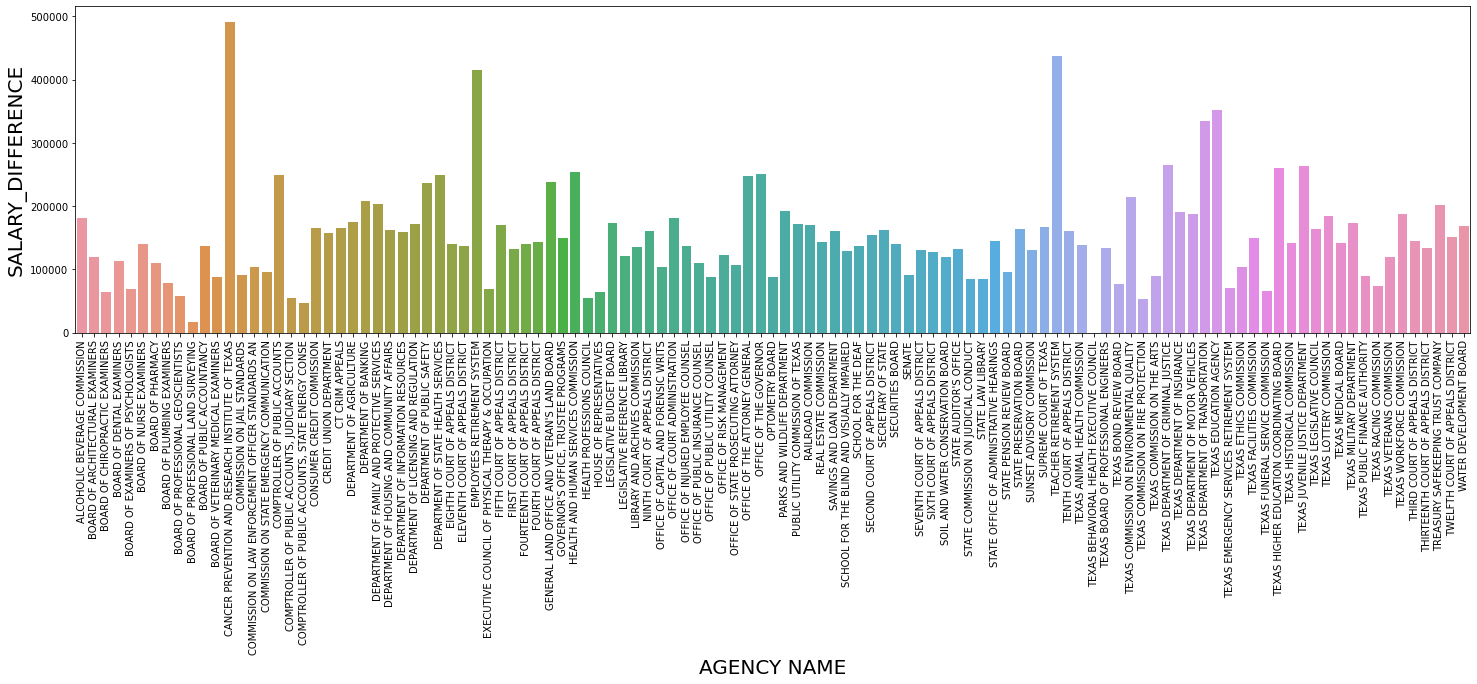

In [752]:
plt.figure(figsize=(25, 6))
sns.barplot(x='AGENCY NAME',y='SALARY_DIFFERENCE',data=df_agencytitle_minmaxsal)
plt.xlabel('AGENCY NAME',fontsize=20)
plt.ylabel('SALARY_DIFFERENCE',fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [753]:
df_agencytitle_minmaxsal.loc[df_agencytitle_minmaxsal['AGENCY NAME']=='TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL']

,AGENCY NAME,CLASS TITLE_x,STATUS_x,ANNUAL_x,CLASS TITLE_y,STATUS_y,ANNUAL_y,SALARY_DIFFERENCE
82,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL,DIRECTOR IV,CRF - CLASSIFIED REGULAR FULL-TIME,120000.0,DIRECTOR IV,CRF - CLASSIFIED REGULAR FULL-TIME,120000.0,0.0


In [754]:
data.loc[data['AGENCY NAME']=='TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL']

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
7,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL,SPINKS,DARREL,D,1623,DIRECTOR IV,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-03-01,0.0,40.0,10000.0,120000.0,147334,True,NaN,NaN,171383.4,NaN


* ####  The plot shows 0 salary difference for 'AGENCY NAME'=='TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL'. 
* #### When checked on the dataset, it is shown that the AGENCY has ONLY ONE Class Title. So, we dont take the salary difference of this AGENCY into consideration.

In [755]:
df_agencytitle_minmaxsal.loc[df_agencytitle_minmaxsal['AGENCY NAME']=='BOARD OF PROFESSIONAL LAND SURVEYING']

,AGENCY NAME,CLASS TITLE_x,STATUS_x,ANNUAL_x,CLASS TITLE_y,STATUS_y,ANNUAL_y,SALARY_DIFFERENCE
9,BOARD OF PROFESSIONAL LAND SURVEYING,PROGRAM SPECIALIST III,CRF - CLASSIFIED REGULAR FULL-TIME,50791.98,CUSTOMER SERVICE REP III,CRF - CLASSIFIED REGULAR FULL-TIME,34272.0,16519.98


* #### **'BOARD OF PROFESSIONAL LAND SURVEYING'** AGENCY has the LOWEST wage difference between its highest paid and lowest paid employees.

In [756]:
df_agencytitle_minmaxsal.loc[df_agencytitle_minmaxsal['AGENCY NAME']=='CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS']

,AGENCY NAME,CLASS TITLE_x,STATUS_x,ANNUAL_x,CLASS TITLE_y,STATUS_y,ANNUAL_y,SALARY_DIFFERENCE
12,CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS,CHIEF SCIENTIFIC OFFICER,ERF - EXEMPT REGULAR FULL-TIME,553500.0,ATTORNEY II,CRF - CLASSIFIED REGULAR FULL-TIME,62328.72,491171.28


* #### **'CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS'** AGENCY has the HIGHEST wage difference between its highest paid and lowest paid employees.

# Task 3 - C : Have salaries and total compensations for some roles/ departments/ head-count changed over time?

In [757]:
# Group the data by 'Class Title' and 'Date' with monthly frequency, and calculate the mean salary for each group
salary_change = data.groupby(['CLASS TITLE', pd.Grouper(key='EMPLOY DATE', freq='M')])['ANNUAL'].mean().reset_index()
salary_change

,CLASS TITLE,EMPLOY DATE,ANNUAL
0,14 CUSTOMER SERVICES REP,2018-01-31,41199.84
1,14 CUSTOMER SERVICES REP,2018-06-30,40802.40
2,14 CUSTOMER SERVICES REP,2018-07-31,40000.80
3,14 CUSTOMER SERVICES REP,2018-10-31,40008.00
4,14 CUSTOMER SERVICES REP,2019-11-30,40008.00
...,...,...,...
45710,YOUTH FACILITY SUPERINTENDENT,2011-12-31,93236.76
45711,YOUTH FACILITY SUPERINTENDENT,2012-10-31,100792.92
45712,YOUTH FACILITY SUPERINTENDENT,2018-02-28,90999.96
45713,YOUTH FACILITY SUPERINTENDENT,2019-01-31,95000.04


In [758]:
data['CLASS TITLE'].value_counts().head(10)

CORREC  OFFICER IV               9267
CORREC  OFFICER V                7895
CORREC OFFCR III                 4718
TEXAS WORKS ADVISOR II           3646
DIRECT SUPPORT PROFESSIONAL I    3307
TROOPER                          2251
CHILD PROTECTIVE SVCS SPEC IV    1854
CHILD PROTECTIVE SVCS SPEC I     1773
ADMINISTRATIVE ASST III          1771
SGT OF CORREC OFFCRS             1743
Name: CLASS TITLE, dtype: int64

Please enter a CLASS TITLE to check its salary change over time:  CORREC  OFFICER IV


,CLASS TITLE,EMPLOY DATE,ANNUAL
9548,CORREC OFFICER IV,1995-06-30,19705.680000
9549,CORREC OFFICER IV,1999-02-28,39411.240000
9550,CORREC OFFICER IV,2000-10-31,19705.680000
9551,CORREC OFFICER IV,2001-03-31,39411.240000
9552,CORREC OFFICER IV,2001-06-30,38450.040000
...,...,...,...
9715,CORREC OFFICER IV,2020-02-29,38332.022182
9716,CORREC OFFICER IV,2020-03-31,37991.726512
9717,CORREC OFFICER IV,2020-04-30,38848.879184
9718,CORREC OFFICER IV,2020-05-31,38360.673982


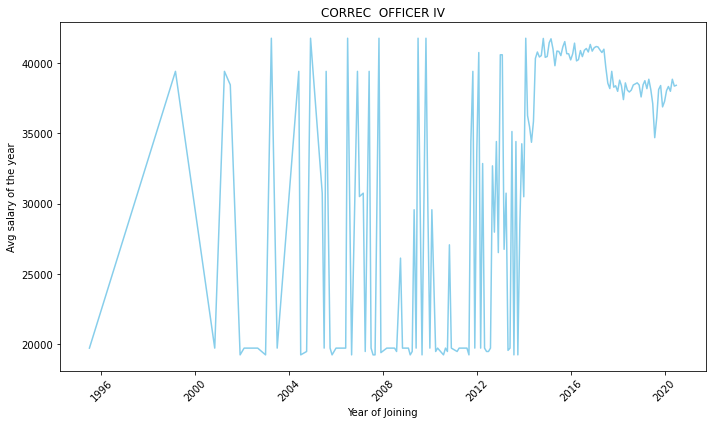

Do you want to check for another CLASS TITLE(y/n):  y
Please enter a CLASS TITLE to check its salary change over time:  TROOPER


,CLASS TITLE,EMPLOY DATE,ANNUAL
44493,TROOPER,1977-12-31,79323.000000
44494,TROOPER,1978-05-31,79323.000000
44495,TROOPER,1979-06-30,79323.000000
44496,TROOPER,1982-01-31,79323.000000
44497,TROOPER,1987-08-31,79323.000000
...,...,...,...
44641,TROOPER,2018-01-31,54798.888000
44642,TROOPER,2018-06-30,54816.381573
44643,TROOPER,2019-01-31,59469.672000
44644,TROOPER,2019-04-30,64918.920000


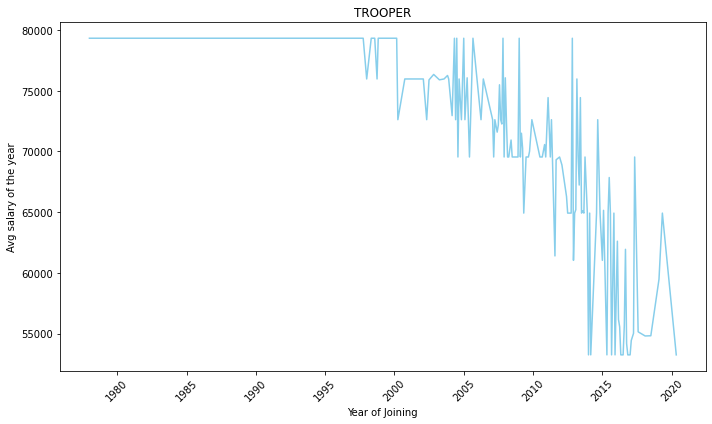

Do you want to check for another CLASS TITLE(y/n):  y
Please enter a CLASS TITLE to check its salary change over time:  SGT OF CORREC OFFCRS


,CLASS TITLE,EMPLOY DATE,ANNUAL
40357,SGT OF CORREC OFFCRS,1981-03-31,46873.08
40358,SGT OF CORREC OFFCRS,1985-07-31,46873.08
40359,SGT OF CORREC OFFCRS,1988-07-31,46873.08
40360,SGT OF CORREC OFFCRS,1989-05-31,46873.08
40361,SGT OF CORREC OFFCRS,1990-01-31,46873.08
...,...,...,...
40654,SGT OF CORREC OFFCRS,2020-01-31,46873.08
40655,SGT OF CORREC OFFCRS,2020-02-29,46873.08
40656,SGT OF CORREC OFFCRS,2020-03-31,46875.51
40657,SGT OF CORREC OFFCRS,2020-05-31,46873.08


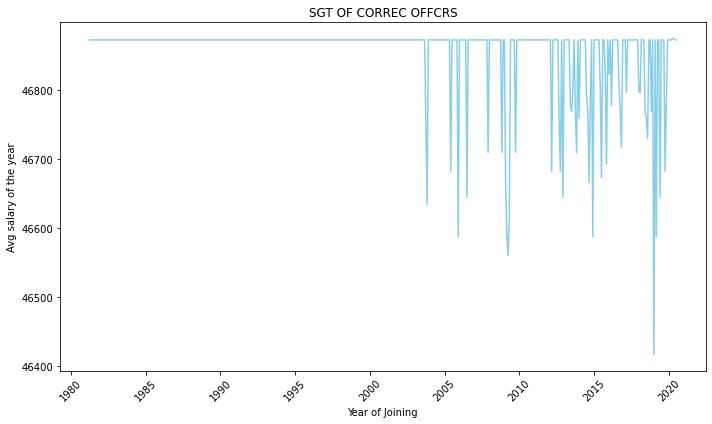

Do you want to check for another CLASS TITLE(y/n):  n


In [759]:
x='y'
while x == 'y':
    user_input = input("Please enter a CLASS TITLE to check its salary change over time: ")
    df_sal_change=salary_change.loc[salary_change['CLASS TITLE']==user_input]
    display(df_sal_change)
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='EMPLOY DATE', y='ANNUAL',data=df_sal_change, color='skyblue',)
    plt.xlabel('Year of Joining')
    plt.ylabel('Avg salary of the year')
    plt.title(user_input)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

    x= input("Do you want to check for another CLASS TITLE(y/n): ")

* For some **CLASS TITLE**s salary has increased, for some **CLASS TITLE**s salary has remained same (with few fluctuations in between) and for **CLASS TITLE**s salary has decreased.

# DATA PREPROCESSING

## 1.CHECKING AND IMPUTING MISSING VALUE

In [760]:
data.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149466
combined_multiple_jobs     149384
summed_annual_salary       149464
hide_from_search           149464
dtype: int64

* During EDA, its found that 98.83% of **HRLY RATE** has its value as 0 which is equivalent to NULL.
* More than 99% of **duplicated, multiple_full_time_jobs, combined_multiple_jobs, summed_annual_salary, hide_from_search** are NULL.
* So, all the above mentioned NULL values and 0s will not be imputed.

## 2.ENCODING CATEGORICAL DATA

### 'AGENCY NAME', 'CLASS CODE' , 'CLASS TITLE', 'ETHNICITY', 'STATUS', 'GENDER'
* 'AGENCY NAME', 'CLASS CODE' , 'CLASS TITLE' have too many categories.So, they will be frequency encoded.
* "GENDER" has only 2 category. So, it will be one-hot encoded.
* 'ETHNICITY' and 'STATUS' have few categories. So, they will be manually encoded because some of them are frequently present while others are not and there is no ordinality. So, label encoding is not used.

In [761]:
data.STATUS.value_counts()

CRF - CLASSIFIED REGULAR FULL-TIME        142502
URF - UNCLASSIFIED REGULAR FULL-TIME        2363
CRP - CLASSIFIED REGULAR PART-TIME          1531
CTF - CLASSIFIED TEMPORARY FULL-TIME        1096
URP - UNCLASSIFIED REGULAR PART-TIME         950
ERF - EXEMPT REGULAR FULL-TIME               923
CTP - CLASSIFIED TEMPORARY PART-TIME          81
UTP - UNCLASSIFIED TEMPORARY PART-TIME        21
UTF - UNCLASSIFIED TEMPORARY FULL-TIME        12
ERP - EXEMPT REGULAR PART-TIME                 1
Name: STATUS, dtype: int64

In [762]:
# Use mannual encoding
data.STATUS = data.STATUS.map({'CRF - CLASSIFIED REGULAR FULL-TIME':9,
                           'URF - UNCLASSIFIED REGULAR FULL-TIME':8,
                           'CRP - CLASSIFIED REGULAR PART-TIME':7,
                           'CTF - CLASSIFIED TEMPORARY FULL-TIME':6,
                           'URP - UNCLASSIFIED REGULAR PART-TIME':5,
                           'ERF - EXEMPT REGULAR FULL-TIME':4,
                           'CTP - CLASSIFIED TEMPORARY PART-TIME':3,
                           'UTP - UNCLASSIFIED TEMPORARY PART-TIME':2,
                           'UTF - UNCLASSIFIED TEMPORARY FULL-TIME':1,
                           'ERP - EXEMPT REGULAR PART-TIME':0})

In [763]:
data.ETHNICITY.value_counts()

WHITE        67141
HISPANIC     40585
BLACK        35853
ASIAN         4268
OTHER          921
AM INDIAN      712
Name: ETHNICITY, dtype: int64

In [764]:
# Use mannual encoding
data.ETHNICITY = data.ETHNICITY.map({'WHITE':5,
                           'HISPANIC':4,
                           'BLACK':3,
                           'ASIAN':2,
                           'OTHER':1,
                           'AM INDIAN':0})

In [765]:
data.GENDER.value_counts()

FEMALE    85327
MALE      64153
Name: GENDER, dtype: int64

In [766]:
# Use one-hot encoding
data.GENDER=pd.get_dummies(data.GENDER,drop_first=True)

In [767]:
# Use frequency encoding
d2=['AGENCY NAME','CLASS CODE','CLASS TITLE']
# Replace each category with its frequency
for col in d2:
    data[col] = data[col].map(data[col].value_counts(normalize=True))

In [768]:
# checking the original data
original_data.head(5)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [770]:
# checking the encoded data
data.head(5)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,0.006911,RUCKER,MORTON,V,0.002168,0.002168,5,1,5,1988-02-18,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,0.001780,RUCKER,MORTON,V,0.000314,0.000314,5,1,3,2015-02-01,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,0.006911,SPECIA JR,JOHN,J,0.002168,0.002168,5,1,5,2020-02-01,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,0.001780,SPECIA JR,JOHN,J,0.000314,0.000314,5,1,3,2018-09-01,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,0.240340,ONTIVEROS,ESTHER,,0.061995,0.061995,4,0,9,2020-06-29,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [771]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149480 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   AGENCY                   149480 non-null  int64         
 1   AGENCY NAME              149480 non-null  float64       
 2   LAST NAME                149480 non-null  object        
 3   FIRST NAME               149480 non-null  object        
 4   MI                       149480 non-null  object        
 5   CLASS CODE               149480 non-null  float64       
 6   CLASS TITLE              149480 non-null  float64       
 7   ETHNICITY                149480 non-null  int64         
 8   GENDER                   149480 non-null  uint8         
 9   STATUS                   149480 non-null  int64         
 10  EMPLOY DATE              149480 non-null  datetime64[ns]
 11  HRLY RATE                149480 non-null  float64       
 12  HRS PER WK      

## 3. HANDLING OUTLIERS

In [171]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

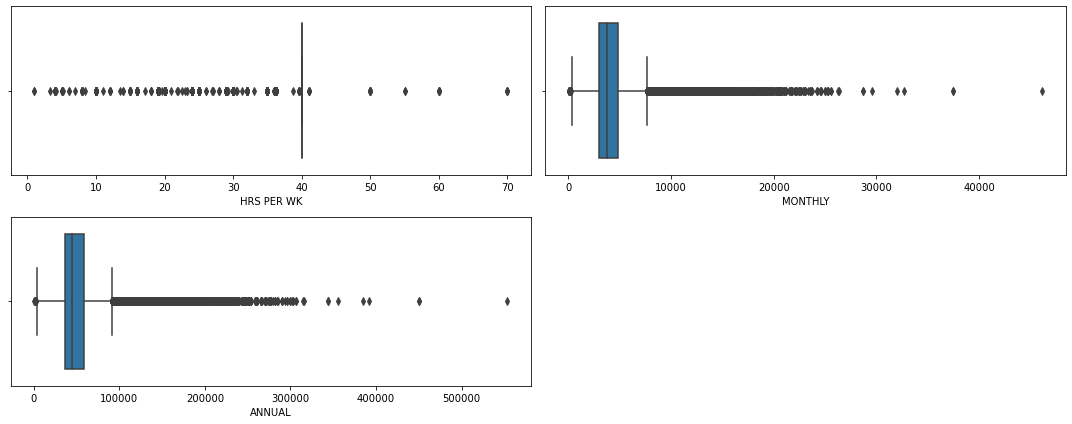

In [772]:
out=['HRS PER WK', 'MONTHLY', 'ANNUAL']
plt.figure(figsize=(15,6)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / accessing the columns from  dataset 
    if plotno<=4:    # set the limit
        plt.subplot(2,2,plotno) # # plotting 11 graphs (3-rows,4-columns) ,plotnumber is for count
        sns.boxplot(x=data[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=10)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

* As there are too many outliers in all 3 columns, we are not imputing any of them.

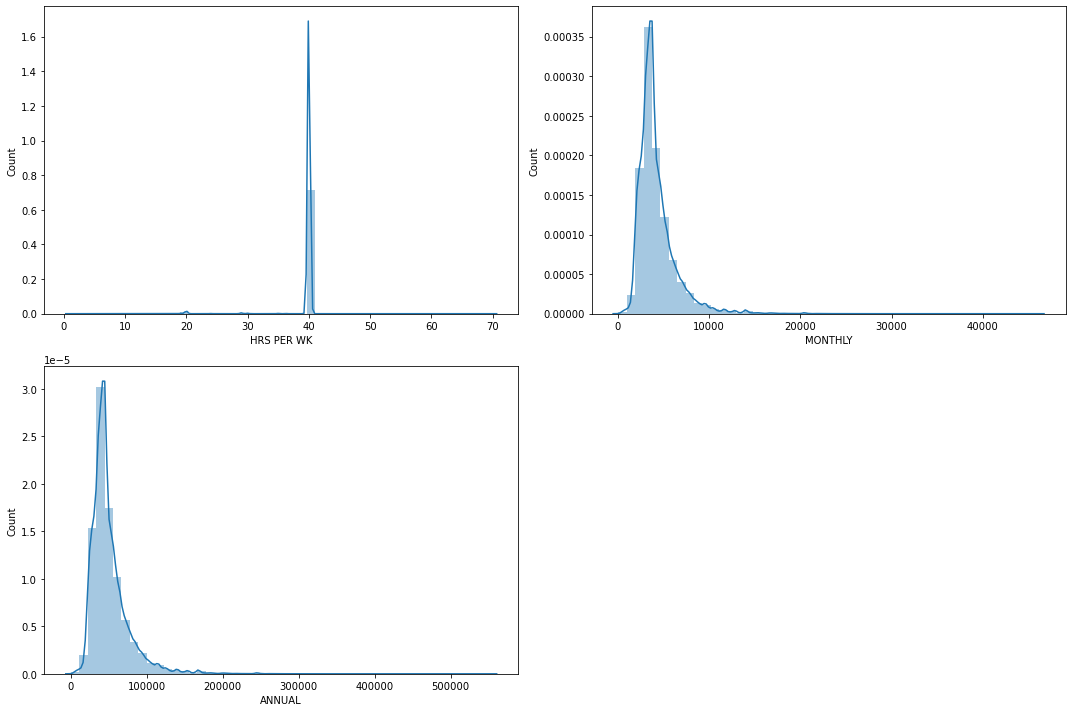

In [773]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for column in out:
    if plotnumber<=3:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber=plotnumber+1
plt.tight_layout()

## 4. CHECK FOR DUPLICATE ROWS

In [774]:
# checking for duplicate ROWS
data.duplicated().sum()

0

* There are no duplicate rows.

# FEATURE ENGINEERING AND FEATURE SELECTION

## CHECK FOR DUPLICATE FEATURES

In [775]:
# checking for duplicate FEATURES
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features

get_duplicate_features(data)

,Desc,feature1,feature2


* There are no duplicate features.

## CREATE NEW FEATURE
### 'Exp_Years' for calculating Years of Experience

In [776]:
from datetime import datetime

# Get the current date
current_date = datetime.now().date()

def exp(row):
    emp_date=row["EMPLOY DATE"].date()
    experience_delta = current_date - emp_date 
    # Convert the difference to years
    years_of_experience = round(experience_delta.days / 365.25,0)  # Consider leap years
    return years_of_experience

data['Exp_Years'] = data.apply(exp, axis=1)



In [777]:
data.loc[data['Exp_Years']<0]

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search,Exp_Years
20904,405,0.067547,HARALSON,JOE,W,0.007372,0.007372,5,1,9,2071-10-06,0.0,40.0,7207.91,86494.92,171968,NaN,NaN,NaN,NaN,NaN,-48.0
88771,601,0.087630,HALFORD,JULIA,F,0.011326,0.011306,5,0,9,2072-08-01,0.0,40.0,3388.44,40661.28,100209,NaN,NaN,NaN,NaN,NaN,-48.0
92736,601,0.087630,OTAHAL,MARY,M,0.007245,0.007238,5,0,9,2073-09-10,0.0,40.0,5733.00,68796.00,180353,NaN,NaN,NaN,NaN,NaN,-50.0
116978,696,0.240340,JUDD,ARTHUR,G,0.000214,0.000214,5,1,9,2069-07-14,0.0,40.0,4033.74,48404.88,68427,NaN,NaN,NaN,NaN,NaN,-45.0
141891,102,0.005225,CRADDICK,TOM,R,0.001211,0.001211,5,1,8,2069-01-14,0.0,40.0,600.00,7200.00,116511,NaN,NaN,NaN,NaN,NaN,-45.0
142425,102,0.005225,THOMPSON,SENFRONIA,,0.001211,0.001211,3,0,8,2073-01-09,0.0,40.0,600.00,7200.00,6963,NaN,NaN,NaN,NaN,NaN,-49.0
148921,592,0.000475,BRANDENBERGER,DONALD,C,0.002910,0.002923,5,1,9,2068-12-01,0.0,40.0,7658.41,91900.92,96871,NaN,NaN,NaN,NaN,NaN,-45.0


In [778]:
negative_exp_indices = data.loc[data['Exp_Years'] < 0].index

# Drop the records with negative experience
data.drop(negative_exp_indices, inplace=True)
data.shape

(149473, 22)

In [779]:
data.head(2)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search,Exp_Years
0,241,0.006911,RUCKER,MORTON,V,0.002168,0.002168,5,1,5,1988-02-18,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN,36.0
1,212,0.001780,RUCKER,MORTON,V,0.000314,0.000314,5,1,3,2015-02-01,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True,9.0


In [436]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search', 'Exp_Years'],
      dtype='object')

### DROP IRRELEVANT FEATURES

In [780]:
d1=['AGENCY','LAST NAME', 'FIRST NAME', 'MI','EMPLOY DATE','HRLY RATE','STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search']
data1=data.drop(d1, axis=1)
data1.head(1)

,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRS PER WK,MONTHLY,ANNUAL,Exp_Years
0,0.006911,0.002168,0.002168,5,1,5,29.0,9545.82,114549.84,36.0


In [781]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149473 entries, 0 to 149480
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   AGENCY NAME  149473 non-null  float64
 1   CLASS CODE   149473 non-null  float64
 2   CLASS TITLE  149473 non-null  float64
 3   ETHNICITY    149473 non-null  int64  
 4   GENDER       149473 non-null  uint8  
 5   STATUS       149473 non-null  int64  
 6   HRS PER WK   149473 non-null  float64
 7   MONTHLY      149473 non-null  float64
 8   ANNUAL       149473 non-null  float64
 9   Exp_Years    149473 non-null  float64
dtypes: float64(7), int64(2), uint8(1)
memory usage: 11.5 MB


## CHECK FOR CORRELATED FEATURES

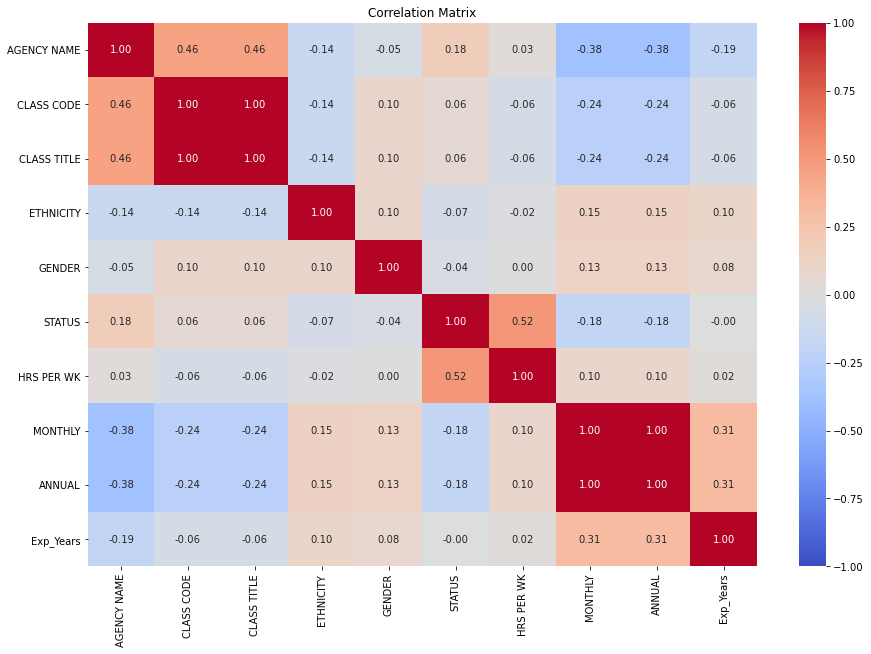

In [782]:
## Checking correlation
plt.figure(figsize=(15,10),facecolor='white')
sns.heatmap(data1.corr(),annot=True,fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

* 'ANNUAL' and 'MONTHLY' are fully correlated. So, we drop 'MONTHLY'.
* 'CLASS CODE' and 'CLASS TITLE' are fully correlated. So, we drop 'CLASS CODE'.

In [783]:
d2=['MONTHLY','CLASS CODE']
data2=data1.drop(d2, axis=1)
data2.head(1)

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRS PER WK,ANNUAL,Exp_Years
0,0.006911,0.002168,5,1,5,29.0,114549.84,36.0


# SPLIT THE DATA FOR TRAIN AND TEST

In [784]:
X=data2.drop('ANNUAL',axis=1)
y=data2.ANNUAL

In [785]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149473 entries, 0 to 149480
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   AGENCY NAME  149473 non-null  float64
 1   CLASS TITLE  149473 non-null  float64
 2   ETHNICITY    149473 non-null  int64  
 3   GENDER       149473 non-null  uint8  
 4   STATUS       149473 non-null  int64  
 5   HRS PER WK   149473 non-null  float64
 6   Exp_Years    149473 non-null  float64
dtypes: float64(4), int64(2), uint8(1)
memory usage: 8.1 MB


In [786]:
X.head(1)

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRS PER WK,Exp_Years
0,0.006911,0.002168,5,1,5,29.0,36.0


In [787]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# FEATURE SCALING
*  It is generally a good approach to perform feature scaling after the train-test split to prevent data leakage.

### MIN-MAX SCALING

* Scale the feature between 0 to 1


* Use min max scaling because of dataset contain large amount of outlier so outlier is going to be biased.

In [788]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODEL BUILDING

## 1. LINEAR REGRESSION

In [789]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train_scaled,y_train)
y_pred=LR.predict(X_test_scaled)

In [790]:
##prediciton on training data
y_train_predict=LR.predict(X_train_scaled)

In [791]:
import math
print('Test R2 Score :',r2_score(y_test,y_pred))
print('Train R2 Score :',r2_score(y_train,y_train_predict))
print('Mean Squared Error is :',mean_squared_error(y_test,y_pred))
print('Root Mean Squard Error is :',math.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error is :',mean_absolute_error(y_test, y_pred))

Test R2 Score : 0.27252579053923265
Train R2 Score : 0.26823545383421177
Mean Squared Error is : 451224892.176819
Root Mean Squard Error is : 21242.05480119141
Mean Absolute Error is : 13798.53054820892


In [673]:
##cross validation
from sklearn.model_selection import cross_val_score
mse=cross_val_score(LR,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(mse)

-464293511.6537919

## 2. RIDGE REGRESSION

In [792]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [793]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [794]:
# For Ridge regression
Rmodel = Ridge()

## Hyper Parameter Tuning Using GridSearchCV

In [795]:
RidgeCV = GridSearchCV(estimator=Rmodel, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

In [796]:
RidgeCV.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [797]:
print("Best hyperparameters:", RidgeCV.best_params_)
print("Best R2 score:", RidgeCV.best_score_)

Best hyperparameters: {'alpha': 0.01}
Best R2 score: 0.268119285341071


In [798]:
best_Rmodel = RidgeCV.best_estimator_
best_Rmodel

Ridge(alpha=0.01)

In [799]:
ridge_hpt=Ridge(alpha=0.01)

In [800]:
ridge_hpt.fit(X_train_scaled, y_train)

Ridge(alpha=0.01)

In [801]:
y_pred=ridge_hpt.predict(X_test_scaled)

In [802]:
##prediciton on training data
y_train_predict=ridge_hpt.predict(X_train_scaled)

In [803]:
print('Test R2 Score :',r2_score(y_test,y_pred))
print('Train R2 Score :',r2_score(y_train,y_train_predict))
print('Mean Squared Error is :',mean_squared_error(y_test,y_pred))
print('Root Mean Squard Error is :',math.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error is :',mean_absolute_error(y_test, y_pred))

Test R2 Score : 0.27252562255399304
Train R2 Score : 0.2682354533137178
Mean Squared Error is : 451224996.3717453
Root Mean Squard Error is : 21242.057253753585
Mean Absolute Error is : 13798.530814198397


In [465]:
##cross validation
mse=cross_val_score(ridge_hpt,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(mse)

-464297284.56186414

## 3. LASSO REGRESSION

In [804]:
from sklearn.linear_model import Lasso

In [805]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [806]:
# For Ridge regression
Lmodel = Lasso()

## Hyper Parameter Tuning Using GridSearchCV

In [807]:
LassoCV = GridSearchCV(estimator=Lmodel, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

In [808]:
LassoCV.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [809]:
print("Best hyperparameters:", LassoCV.best_params_)
print("Best R2 score:", LassoCV.best_score_)

Best hyperparameters: {'alpha': 0.01}
Best R2 score: 0.268119281127919


In [810]:
best_Lmodel = LassoCV.best_estimator_
best_Lmodel

Lasso(alpha=0.01)

In [811]:
lasso_hpt=Lasso(alpha=0.01)

In [812]:
lasso_hpt.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [813]:
y_pred=lasso_hpt.predict(X_test_scaled)

In [814]:
##prediciton on training data
y_train_predict=lasso_hpt.predict(X_train_scaled)

In [815]:
print('Test R2 Score :',r2_score(y_test,y_pred))
print('Train R2 Score :',r2_score(y_train,y_train_predict))
print('Mean Squared Error is :',mean_squared_error(y_test,y_pred))
print('Root Mean Squard Error is :',math.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error is :',mean_absolute_error(y_test, y_pred))

Test R2 Score : 0.27252571144800386
Train R2 Score : 0.26823545349664113
Mean Squared Error is : 451224941.23413366
Root Mean Squard Error is : 21242.055955912874
Mean Absolute Error is : 13798.523487454699


In [478]:
##cross validation
mse=cross_val_score(lasso_hpt,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(mse)

-464297286.8442504

## 4. GRADIENT BOOSTING REGRESSION

In [816]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor() ## object creation
gbr.fit(X_train_scaled,y_train) ## fitting the data
y_pred=gbr.predict(X_test_scaled)

In [817]:
##prediciton on training data
y_train_predict=gbr.predict(X_train_scaled)

In [818]:
print('Test R2 Score :',r2_score(y_test,y_pred))
print('Train R2 Score :',r2_score(y_train,y_train_predict))
print('Mean Squared Error is :',mean_squared_error(y_test,y_pred))
print('Root Mean Squard Error is :',math.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error is :',mean_absolute_error(y_test, y_pred))

Test R2 Score : 0.5357545061829732
Train R2 Score : 0.5390450926334668
Mean Squared Error is : 287954019.767156
Root Mean Squard Error is : 16969.207988800066
Mean Absolute Error is : 10271.415312002595


In [482]:
##cross validation
mse=cross_val_score(gbr,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(mse)

-294984096.45067334

## 5. XG BOOST REGRESSION

In [819]:
from xgboost import XGBRegressor

xgb_r= XGBRegressor() ## object creation
xgb_r.fit(X_train_scaled,y_train)# fitting the data
y_pred=xgb_r.predict(X_test_scaled)

In [820]:
##prediciton on training data
y_train_predict=xgb_r.predict(X_train_scaled)

In [821]:
print('Test R2 Score :',r2_score(y_test,y_pred))
print('Train R2 Score :',r2_score(y_train,y_train_predict))
print('Mean Squared Error is :',mean_squared_error(y_test,y_pred))
print('Root Mean Squard Error is :',math.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error is :',mean_absolute_error(y_test, y_pred))

Test R2 Score : 0.8130801276778251
Train R2 Score : 0.855282123393333
Mean Squared Error is : 115939366.83583112
Root Mean Squard Error is : 10767.514422364668
Mean Absolute Error is : 5326.1017920356335


In [693]:
##cross validation
mse=cross_val_score(xgb_r,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(mse)

-123308009.38617896

## Hyper Parameter Tuning Using RandomizedSearchCV

In [694]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)] # no. of models 
max_depth = [3,4,5,6]#The maximum depth of a tree
learning_rate=[0.1,0.2,0.3] #Typical final values to be used: 0.01-0.3
gamma=[0, 1, 2, 3, 4] # Gamma specifies the minimum loss reduction required to make a split. It controls the overfitting. 
                      # Ranges from 0 to ∞.
subsample=[0.5,0.7,1] # no of samples to be used. For eg: 0.5 -> half of the training data (50%) used to train each tree.
                     #Lower values make the algorithm more conservative and prevents overfitting but too 
                     #small values might lead to under-fitting.Typical values: 0.5-1. Range: (0,1)
colsample_bytree=[0.5,0.7,1]#Denotes the fraction of columns to be randomly samples for each tree. Ranges from 0 to 1
                          # ie., % of features should be taken for each tree
    
params={
    'max_depth':max_depth,'learning_rate':learning_rate,'n_estimators':n_estimators,
     'gamma':gamma, 'subsample':subsample, 'colsample_bytree':colsample_bytree
}
    
XGB=XGBRegressor(random_state=42)

rcv= RandomizedSearchCV(XGB, scoring='r2',param_distributions=params, n_iter=100, cv=3, 
                                random_state=42, n_jobs=-1)

In [695]:
rcv.fit(X_train_scaled, y_train) ##training data on randomsearch cv.
cv_best_params = rcv.best_params_ ##it will give you best parameters 
print(f"Best paramters: {cv_best_params}")

Best paramters: {'subsample': 1, 'n_estimators': 1400, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1}


In [822]:
XGB2=XGBRegressor(subsample= 1,
 n_estimators= 1400,
 max_depth= 6,
 learning_rate= 0.1, gamma=0,
 colsample_bytree= 1)

XGB2.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [823]:
y_pred=XGB2.predict(X_test_scaled)#testing

In [824]:
##prediciton on training data
y_train_predict=XGB2.predict(X_train_scaled)

In [825]:
print('Test R2 Score :',r2_score(y_test,y_pred))
print('Train R2 Score :',r2_score(y_train,y_train_predict))
print('Mean Squared Error is :',mean_squared_error(y_test,y_pred))
print('Root Mean Squard Error is :',math.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error is :',mean_absolute_error(y_test, y_pred))

Test R2 Score : 0.8533490682012758
Train R2 Score : 0.9208562493395436
Mean Squared Error is : 90962057.52442975
Root Mean Squard Error is : 9537.403080735854
Mean Absolute Error is : 4153.726289168567


In [826]:
X_test_scaled.shape

(37369, 7)

In [827]:
adj_r2=1-(1-0.8533)*(37369-1)/(37369-7-1)
print('Adjusted R2 Score on Test data is :',adj_r2)

Adjusted R2 Score on Test data is : 0.8532725141190011


In [702]:
##cross validation
mse=cross_val_score(XGB2,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(mse)

-101169922.14560197

## 6. RANDOM FOREST REGRESSION

In [365]:
from sklearn.ensemble import RandomForestRegressor

In [828]:
forest_model = RandomForestRegressor(n_estimators=100, verbose=3, random_state=0)
forest_model.fit(X_train_scaled,y_train)
y_pred = forest_model.predict(X_test_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


In [829]:
##prediciton on training data
y_train_predict=forest_model.predict(X_train_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished


In [830]:
print('Test R2 Score :',r2_score(y_test,y_pred))
print('Train R2 Score :',r2_score(y_train,y_train_predict))
print('Mean Squared Error is :',mean_squared_error(y_test,y_pred))
print('Root Mean Squard Error is :',math.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error is :',mean_absolute_error(y_test, y_pred))

Test R2 Score : 0.7905456512170255
Train R2 Score : 0.9463656066288869
Mean Squared Error is : 129916655.07375011
Root Mean Squard Error is : 11398.09874820139
Mean Absolute Error is : 4714.356259301396


## Hyper Parameter Tuning Using RandomizedSearchCV

In [683]:
from scipy.stats import randint, uniform
# Define the parameter distribution
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [100, 200, 300]}

# Create the RandomForestRegressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Instantiate RandomizedSearchCV
random_searchcv = RandomizedSearchCV(estimator=rf_regressor, param_distributions=random_grid,
                                   scoring='r2', cv=3, n_iter=100, verbose=2, n_jobs=-1, random_state=42)



In [684]:
# Fit the randomized search to the data
random_searchcv.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2', verbose=2)

In [685]:
# Get the best hyperparameters
best_params = random_searchcv.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = random_searchcv.best_estimator_
best_model

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}


RandomForestRegressor(max_depth=50, max_features='auto', min_samples_split=5,
                      n_estimators=200, random_state=42)

In [831]:
rf_reg_hpt = RandomForestRegressor(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 1, 
                                 max_features= 'auto', max_depth= 50,random_state=42,bootstrap=True)

In [832]:
rf_reg_hpt.fit(X_train_scaled,y_train)
y_pred = rf_reg_hpt.predict(X_test_scaled)

In [833]:
##prediciton on training data
y_train_predict=rf_reg_hpt.predict(X_train_scaled)

In [834]:
print('Test R2 Score :',r2_score(y_test,y_pred))
print('Train R2 Score :',r2_score(y_train,y_train_predict))
print('Mean Squared Error is :',mean_squared_error(y_test,y_pred))
print('Root Mean Squard Error is :',math.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error is :',mean_absolute_error(y_test, y_pred))

Test R2 Score : 0.7963993599534207
Train R2 Score : 0.9238209137331412
Mean Squared Error is : 126285819.69970663
Root Mean Squard Error is : 11237.696369795129
Mean Absolute Error is : 4699.841591171085


# CONCLUSION

In [835]:
from tabulate import tabulate

# * For each model, R2-score after hyperparameter tuning is chosen.
headers = ["MODELS => ", "Linear ", "Ridge ", "Lasso ","GRADIENT BOOSTING ", "XG BOOST", "Random Forest"]
data = [["Test", 0.272, 0.272, 0.272, 0.536,0.853,0.796],
        ["Train", 0.268, 0.268, 0.268, 0.539,0.920,0.923]]
        

# Generate the table
table = tabulate(data, headers=headers, tablefmt="grid",stralign="center", numalign="center")

# Print the label
print("R2-SCORE OF DIFFERENT MODELS ON TEST AND TRAIN DATA:")
# Print the table
print(table)

R2-SCORE OF DIFFERENT MODELS ON TEST AND TRAIN DATA:
+--------------+-----------+----------+----------+----------------------+------------+-----------------+
|  MODELS =>   |  Linear   |  Ridge   |  Lasso   |  GRADIENT BOOSTING   |  XG BOOST  |  Random Forest  |
+==============+===========+==========+==========+======================+============+=================+
|     Test     |   0.272   |  0.272   |  0.272   |        0.536         |   0.853    |      0.796      |
+--------------+-----------+----------+----------+----------------------+------------+-----------------+
|    Train     |   0.268   |  0.268   |  0.268   |        0.539         |    0.92    |      0.923      |
+--------------+-----------+----------+----------+----------------------+------------+-----------------+


* R2 score on Test data using **XGBOOST** model after hyperparameter tuning is better than any other model.
* **Adjusted R2 Score** on Test data using **XGBOOST** model after hyperparameter tuning is : **0.853**